<a href="https://colab.research.google.com/github/CristaldoWeint/https-github.com-CristaldoWeint-Fundamentos-de-M-todos-Anal-ticos-Predictivos/blob/main/Clase_2_Script_1_FMAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

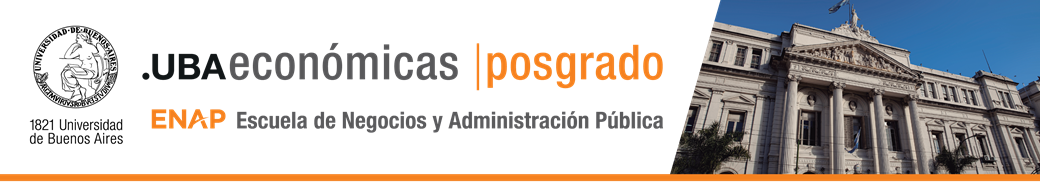

MAESTRÍA EN GESTIÓN Y ANÁLISIS DE DATOS FINANCIEROS (VIRTUAL)
# Fundamentos de Métodos Analíticos Predictivos (FMAP)

Rodrigo Del Rosso

**Clase 2: Aplicación: Distintas formas de imputar datos faltantes/Datos**

Quienes trabajan en el campo de la ciencia de datos comprenden la importancia de los datos, los datos son el recurso para impulsar un modelo de aprendizaje automático.

La mayoría de los algoritmos de Machine Learning esperan conjuntos de datos completos y limpios sin ningun tipo de ruido o perturbación; desafortunadamente, los conjuntos de datos del mundo real son desordenados, se encuentran en diferentes escalas de medición y siempre existen los conocidos valores faltantes, es por ello que el manejo de datos faltantes se vuelve muy importante para realizar un correcto análisis.

*   https://www.kaggle.com/residentmario/simple-techniques-for-missing-data-imputation
*   https://ichi.pro/es/una-guia-rapida-sobre-tecnicas-de-imputacion-de-datos-faltantes-en-python-2020-92431787695134
*   https://machinelearningmastery.com/handle-missing-data-python/

En esta clase asincrónica repasaremos cómo manejar los datos faltantes para el aprendizaje automático con Python con un ejemplo de datos financieros.

1.   Seleccionar valores perdidos en su conjunto de datos.
2.   Eliminar valores perdidos en su conjunto de datos.
3.   Imputar valores perdidos con técnicas de imputación simple y múltiple.

Trabajaremos con un archivo que contiene datos de los 10 últimos balances trimestrales y anuales de los 4000 tickers más líquidos en los mercados financieros de Estados Unidos. Estas empresan cotizan hace más de 5 años.

## **Cargando librerías necesarias**

In [1]:
import pandas as pd # módulo para tratamiento de datos
import numpy as np # módulo para tratamiento de matrices
import missingno as msno # librería para tratamiento de datos perdidos
import matplotlib.pyplot as plt # módulo graficador

## **Cargamos nuestro set de datos a trabajar**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [5]:
df = pd.read_csv('/content/balances.csv', sep = ";")
print(df.shape)
df.head(100)

(63412, 24)


,symbol,period,date,intangibleAssets,totalLiab,totalStockholderEquity,otherCurrentLiab,totalAssets,commonStock,otherCurrentAssets,...,otherStockholderEquity,propertyPlantEquipment,totalCurrentAssets,longTermInvestments,netTangibleAssets,shortTermInvestments,netReceivables,longTermDebt,inventory,accountsPayable
0,A,trimestral,31/1/2020,1.059000e+09,4.653000e+09,4.848000e+09,4.150000e+08,9.501000e+09,3000000.0,204000000.0,...,-5.210000e+08,1.035000e+09,3.102000e+09,118000000.0,2.000000e+08,NaN,9.660000e+08,1.787000e+09,7.060000e+08,3.290000e+08
1,A,anual,31/10/2019,1.107000e+09,4.704000e+09,4.748000e+09,6.660000e+08,9.452000e+09,3000000.0,130000000.0,...,-5.140000e+08,8.500000e+08,3.189000e+09,102000000.0,4.800000e+07,NaN,9.980000e+08,1.786000e+09,6.790000e+08,3.540000e+08
2,A,trimestral,31/10/2019,1.107000e+09,4.704000e+09,4.748000e+09,6.660000e+08,9.452000e+09,3000000.0,130000000.0,...,-5.140000e+08,8.500000e+08,3.189000e+09,102000000.0,4.800000e+07,NaN,9.980000e+08,1.786000e+09,6.790000e+08,3.540000e+08
3,A,anual,31/10/2018,4.910000e+08,3.970000e+09,4.567000e+09,4.350000e+08,8.541000e+09,3000000.0,128000000.0,...,-4.080000e+08,8.220000e+08,3.848000e+09,68000000.0,1.103000e+09,0.000000e+00,8.350000e+08,1.799000e+09,6.380000e+08,3.400000e+08
4,A,trimestral,31/7/2019,5.110000e+08,3.878000e+09,4.747000e+09,3.810000e+08,8.625000e+09,3000000.0,176000000.0,...,-4.040000e+08,8.390000e+08,3.457000e+09,99000000.0,1.129000e+09,NaN,8.560000e+08,1.294000e+09,6.600000e+08,3.160000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,AAL,trimestral,30/9/2017,6.305000e+09,4.845300e+10,3.948000e+09,7.546000e+09,5.240100e+10,5000000.0,826000000.0,...,-5.127000e+09,3.331100e+10,1.000200e+10,NaN,3.948000e+09,5.821000e+09,1.924500e+10,2.221700e+10,1.315000e+09,5.294000e+09
96,AAL,anual,31/12/2010,9.320000e+08,2.903300e+10,0.000000e+00,5.741000e+09,2.508800e+10,339000000.0,560000000.0,...,NaN,1.508200e+10,0.000000e+00,NaN,NaN,4.778000e+09,NaN,9.253000e+09,5.940000e+08,1.156000e+09
97,AAN,trimestral,31/12/2019,2.506720e+08,1.560540e+09,1.737260e+09,NaN,3.297800e+09,45376000.0,10131000.0,...,-1.900000e+04,5.070010e+08,3.514150e+08,NaN,7.500050e+08,NaN,1.981020e+08,2.571440e+08,1.400000e+07,8.995900e+07
98,AAN,anual,31/12/2019,2.506720e+08,1.560540e+09,1.737260e+09,NaN,3.297800e+09,45376000.0,10131000.0,...,-1.900000e+04,5.070010e+08,3.514150e+08,NaN,7.500050e+08,NaN,1.981020e+08,2.571440e+08,1.400000e+07,8.995900e+07


In [6]:
np.set_printoptions(precision = 200, suppress = True)

## **Análisis Exploratorio de Datos**

In [7]:
# Entendiendo nuestro set de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63412 entries, 0 to 63411
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   symbol                   63412 non-null  object 
 1   period                   63412 non-null  object 
 2   date                     63412 non-null  object 
 3   intangibleAssets         55946 non-null  float64
 4   totalLiab                62682 non-null  float64
 5   totalStockholderEquity   62480 non-null  float64
 6   otherCurrentLiab         58038 non-null  float64
 7   totalAssets              62767 non-null  float64
 8   commonStock              61601 non-null  float64
 9   otherCurrentAssets       57262 non-null  float64
 10  retainedEarnings         59159 non-null  float64
 11  otherLiab                59692 non-null  float64
 12  otherAssets              61882 non-null  float64
 13  totalCurrentLiabilities  61889 non-null  float64
 14  otherStockholderEquity

In [8]:
# Empezamos realizando un análisis descriptivo de las variables para entender sus dimensiones
df.describe()

,intangibleAssets,totalLiab,totalStockholderEquity,otherCurrentLiab,totalAssets,commonStock,otherCurrentAssets,retainedEarnings,otherLiab,otherAssets,...,otherStockholderEquity,propertyPlantEquipment,totalCurrentAssets,longTermInvestments,netTangibleAssets,shortTermInvestments,netReceivables,longTermDebt,inventory,accountsPayable
count,5.594600e+04,6.268200e+04,6.248000e+04,5.803800e+04,6.276700e+04,6.160100e+04,5.726200e+04,5.915900e+04,5.969200e+04,6.188200e+04,...,4.480700e+04,6.127000e+04,5.911000e+04,3.029300e+04,5.214100e+04,4.615000e+04,4.938800e+04,5.783800e+04,5.227600e+04,6.187200e+04
mean,1.792674e+13,7.551092e+10,2.074235e+10,1.723693e+13,9.681182e+10,7.566706e+09,1.486682e+14,3.389793e+13,1.027613e+10,3.273295e+13,...,5.111968e+09,2.269081e+10,5.010276e+10,2.315105e+14,3.571021e+10,2.135648e+14,7.796038e+09,8.644863e+13,1.055944e+14,1.363402e+12
std,4.227820e+15,2.941262e+12,8.236929e+11,4.150914e+15,3.605694e+12,4.652554e+11,1.196530e+16,5.814375e+15,3.354257e+11,5.685728e+15,...,1.954127e+11,1.259128e+12,1.503267e+12,1.519977e+16,1.100447e+12,1.451284e+16,2.086396e+11,8.778287e+15,1.003744e+16,3.292647e+14
min,0.000000e+00,0.000000e+00,-2.569410e+11,-1.410000e+08,0.000000e+00,-2.285100e+10,-1.560000e+07,-1.267860e+12,-1.328410e+08,-1.000000e+05,...,-3.158960e+12,-4.937820e+08,0.000000e+00,0.000000e+00,-2.752850e+11,0.000000e+00,-2.362800e+07,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.022625e+07,2.029410e+08,1.831918e+08,1.322225e+07,4.839160e+08,1.120000e+05,5.628250e+06,-9.786700e+07,1.580800e+07,1.082375e+07,...,-9.579100e+07,3.284375e+07,8.572025e+07,1.292800e+07,5.650000e+06,0.000000e+00,3.018675e+07,5.046125e+07,1.327250e+06,1.443675e+07
50%,8.636600e+07,1.164365e+09,6.725955e+08,6.774100e+07,2.031680e+09,9.680000e+05,2.900000e+07,1.193450e+08,9.123500e+07,7.631350e+07,...,-6.776000e+06,2.434000e+08,3.737520e+08,1.102430e+08,2.385150e+08,1.052300e+07,1.474350e+08,4.851190e+08,4.530200e+07,9.001300e+07
75%,5.264920e+08,5.076200e+09,2.350390e+09,3.716802e+08,7.888690e+09,4.530000e+07,1.446515e+08,1.086485e+09,5.111665e+08,5.642660e+08,...,6.100000e+04,1.497975e+09,1.549475e+09,1.034590e+09,1.139540e+09,1.253412e+08,6.190000e+08,2.245030e+09,3.297118e+08,5.300000e+08
max,1.000000e+18,2.079130e+14,5.921070e+13,1.000000e+18,2.368550e+14,5.641200e+13,1.000000e+18,1.000000e+18,3.203670e+13,1.000000e+18,...,1.323330e+13,9.372900e+13,1.217330e+14,1.000000e+18,7.199220e+13,1.000000e+18,1.616840e+13,1.000000e+18,1.000000e+18,8.190000e+16


In [9]:
# explorando la cantidad de valores perdidos en las variables
df.isna().sum()/df.shape[0]*100

,0
symbol,0.000000
period,0.000000
date,0.000000
intangibleAssets,11.773797
totalLiab,1.151202
totalStockholderEquity,1.469753
otherCurrentLiab,8.474737
totalAssets,1.017158
commonStock,2.855926
otherCurrentAssets,9.698480


<Axes: >

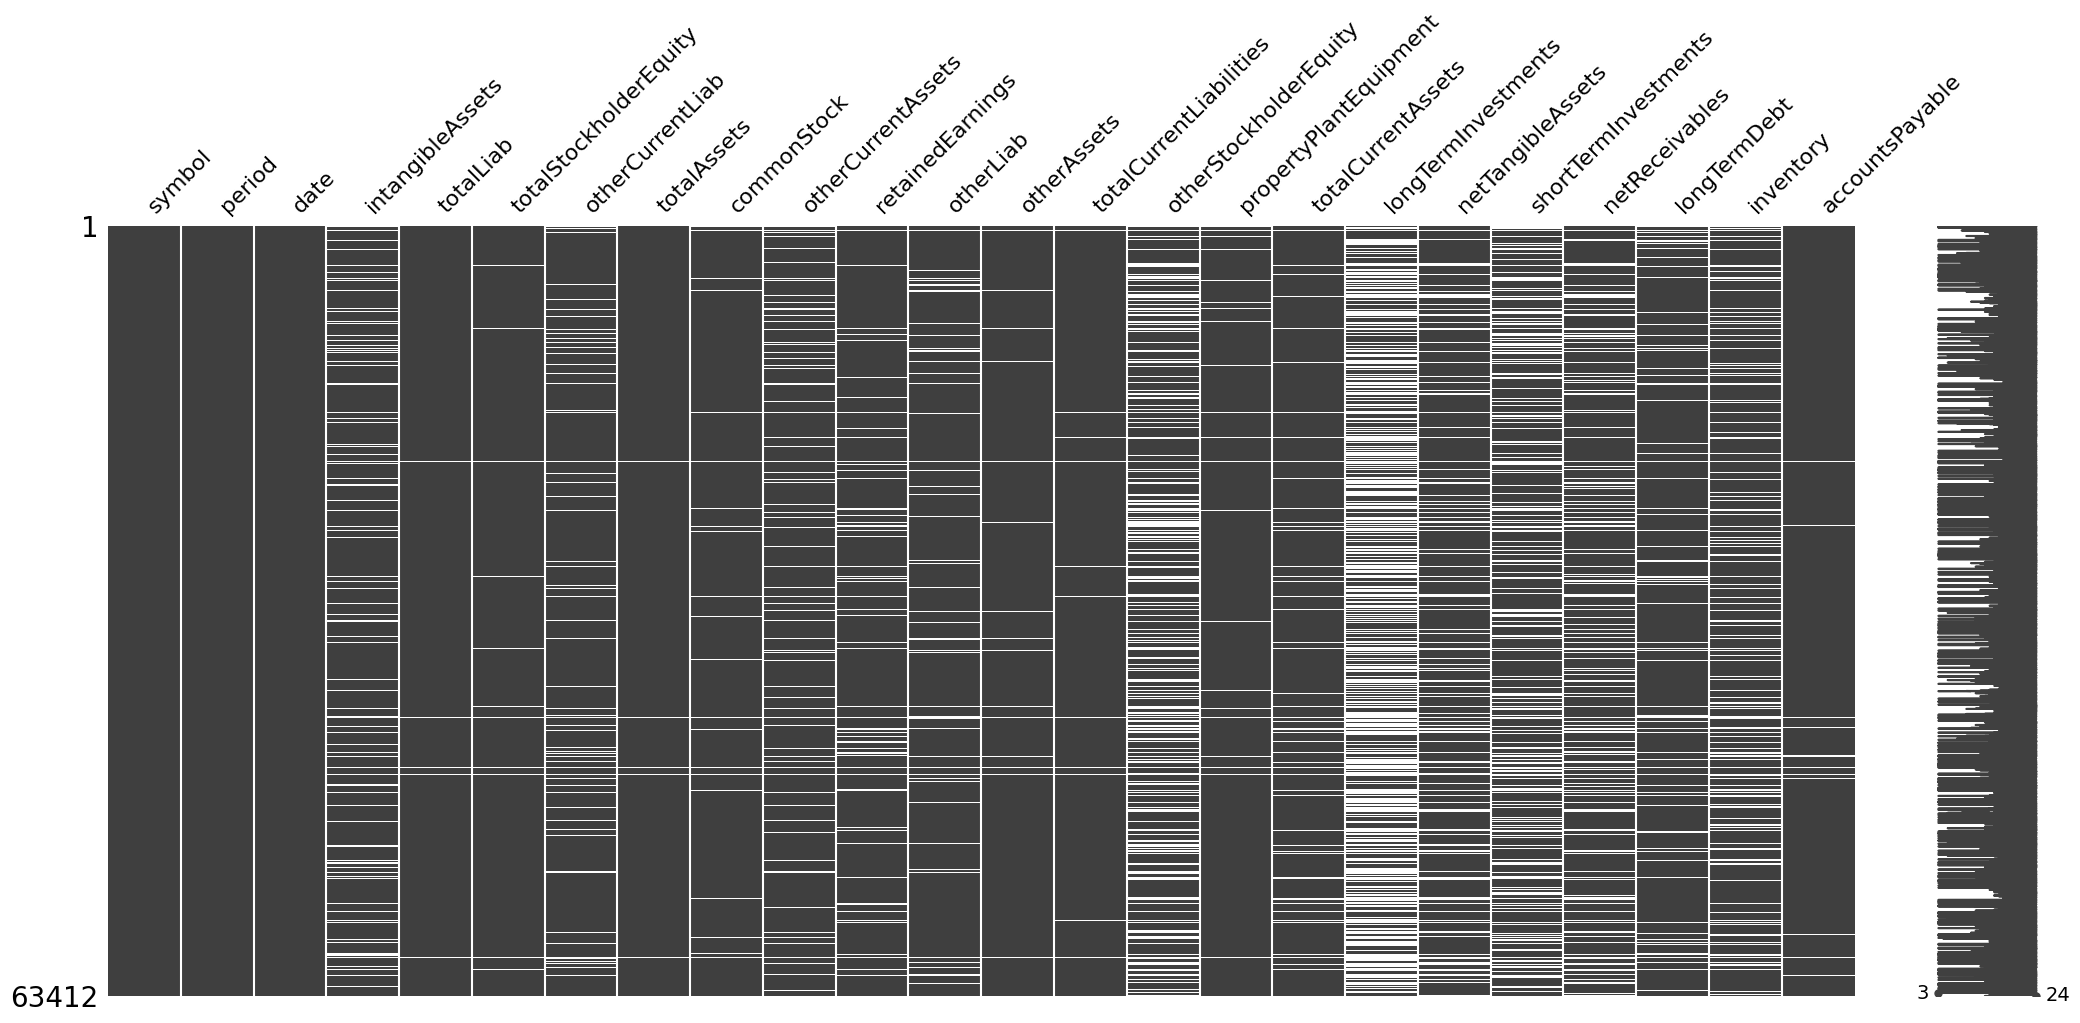

In [10]:
# matrix missing
msno.matrix(df)

<Axes: >

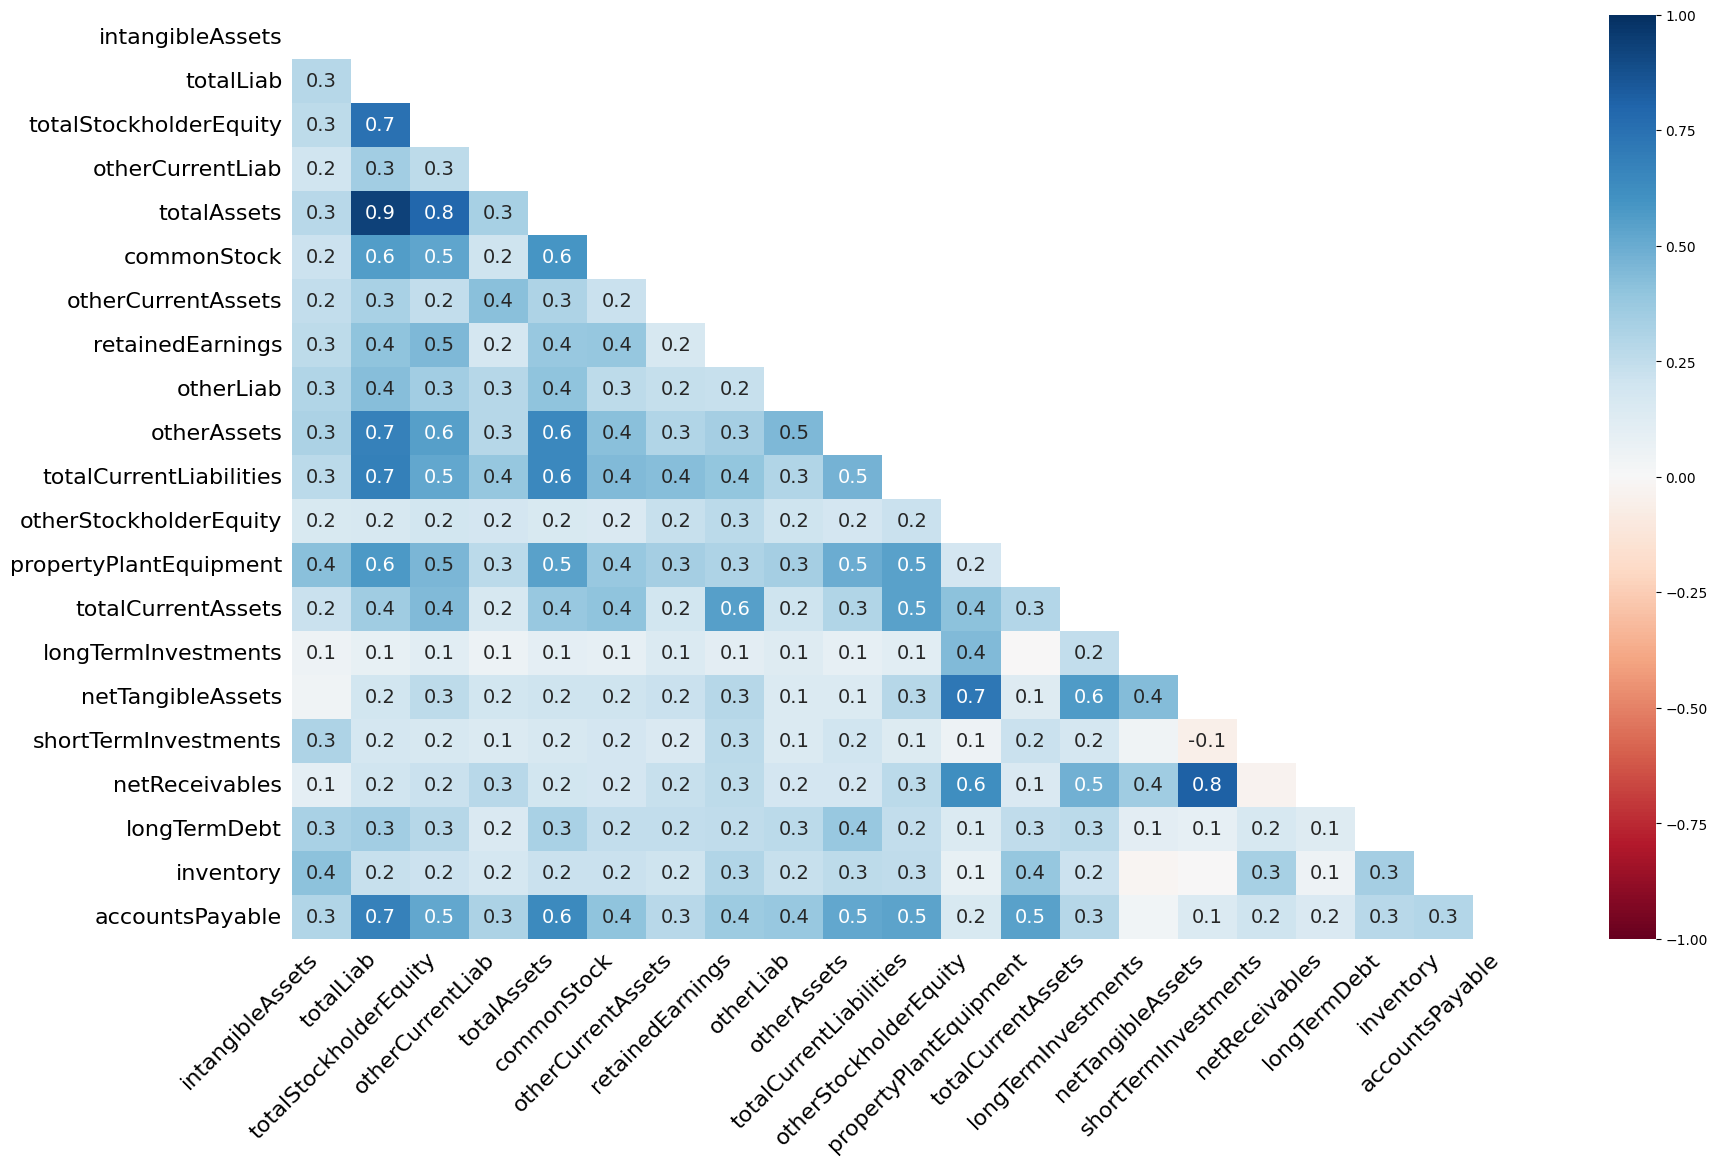

In [11]:
# heatmap missing
msno.heatmap(df)

<Axes: >

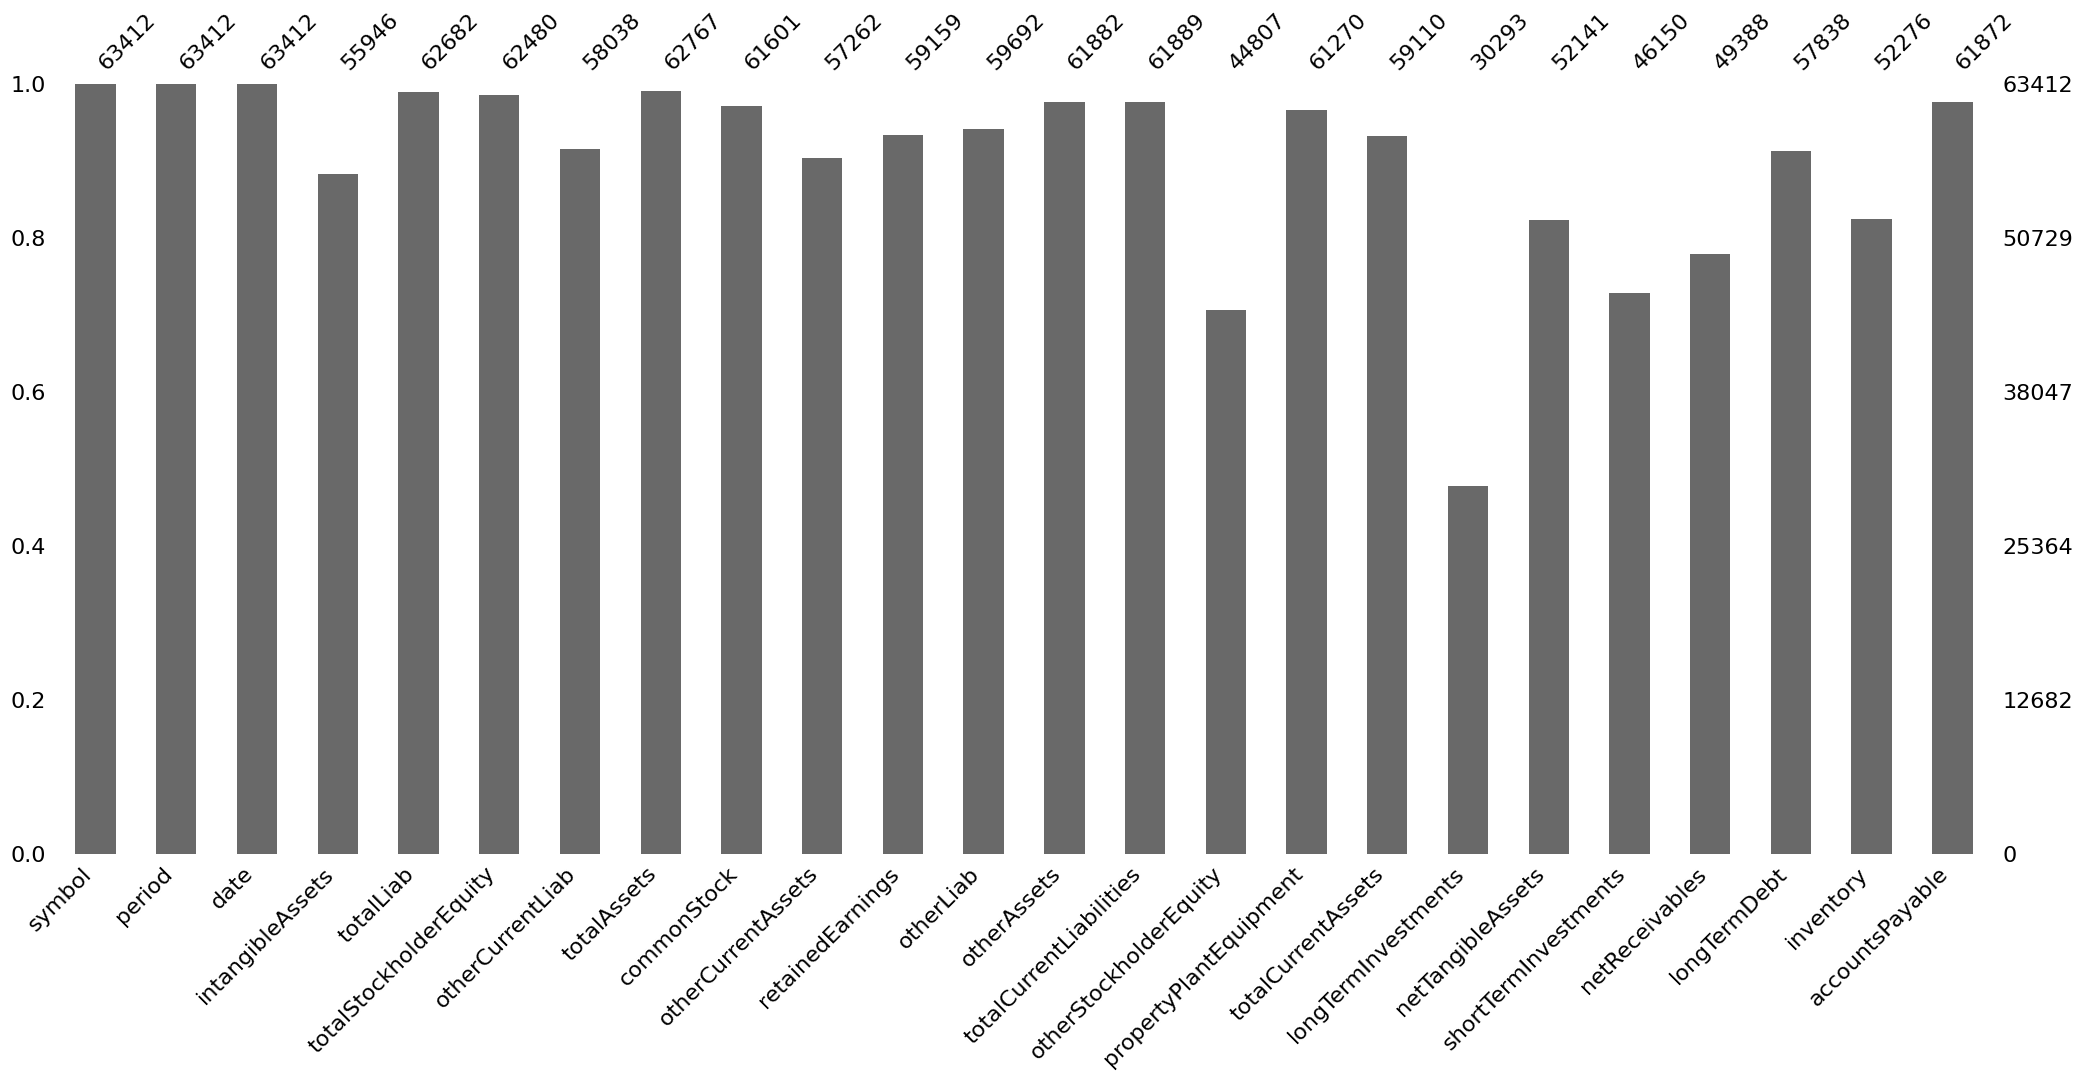

In [12]:
# bar missing
msno.bar(df)

## **Técnicas de imputación de datos**

Si bien el eliminar registros de un conjunto de datos resulta la manera más sencilla de solucionar el problema de datos faltantes, se debe tener en cuenta que se pierde información.

En lugar de simplemente eliminar filas o columnas que contienen los valores faltantes, una mejor estrategia es imputar los valores perdidos.

Para llevar a cabo esta tarea, existen diferentes técnicas a implementar. Veamos algunas de ellas a continuación.

In [13]:
df_imput01 = df.dropna() # hacemos una copia de nuestra base de datos

# Comparamos nuestra data original vs la data reducida luego de la imputación
print('nro de filas originales:',df.shape[0])
print('nro de filas imput01:',df_imput01.shape[0])
print('% de pérdida:',(df_imput01.shape[0]/df.shape[0])*100)

nro de filas originales: 63412
nro de filas imput01: 16350
% de pérdida: 25.783763325553522


In [14]:
df_imput02 = df.drop(['otherStockholderEquity', 'intangibleAssets', 'longTermInvestments'], axis=1)
df_imput02 = df_imput02.dropna()

# Comparamos nuestra data original vs la data reducida luego de la imputación
print('nro de filas originales:',df.shape[0], '/ nro de variables originales:',df.shape[1])
print('nro de filas imput02:',df_imput02.shape[0],'/ nro de variables imput02:',df_imput02.shape[1])
print('% de pérdida:',(df_imput02.shape[0]/df.shape[0])*100)

nro de filas originales: 63412 / nro de variables originales: 24
nro de filas imput02: 28772 / nro de variables imput02: 21
% de pérdida: 45.37311549864379


In [15]:
df_imput03 = df # Copiamos nuestra base de datos para probar técnicas de imputación de datos
df_imput03.isnull().sum()/df_imput03.shape[0]

,0
symbol,0.000000
period,0.000000
date,0.000000
intangibleAssets,0.117738
totalLiab,0.011512
totalStockholderEquity,0.014698
otherCurrentLiab,0.084747
totalAssets,0.010172
commonStock,0.028559
otherCurrentAssets,0.096985


In [16]:
df_imput03['longTermInvestments_imput_1'] = df_imput03['longTermInvestments'].fillna( df_imput03['longTermInvestments'].mean()) # Imputando los valores perdidos por la media
df_imput03['longTermInvestments_imput_2'] = df_imput03['longTermInvestments'].fillna( df_imput03['longTermInvestments'].median()) # Imputando los valores perdidos por la mediana

In [17]:
df_imput03[['longTermInvestments','longTermInvestments_imput_1','longTermInvestments_imput_2']].describe()

,longTermInvestments,longTermInvestments_imput_1,longTermInvestments_imput_2
count,3.029300e+04,6.341200e+04,6.341200e+04
mean,2.315105e+14,2.315105e+14,1.105966e+14
std,1.519977e+16,1.050555e+16,1.050618e+16
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.292800e+07,1.349250e+08,1.102430e+08
50%,1.102430e+08,2.315105e+14,1.102430e+08
75%,1.034590e+09,2.315105e+14,1.102430e+08
max,1.000000e+18,1.000000e+18,1.000000e+18


In [18]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [19]:
imp = IterativeImputer(max_iter=10, random_state=0)

In [20]:
# Seleccionamos variables a imputar
df[['longTermInvestments','intangibleAssets','netReceivables','inventory']].isnull().sum()/df.shape[0]

,0
longTermInvestments,0.522283
intangibleAssets,0.117738
netReceivables,0.221157
inventory,0.175613


In [21]:
# Realizamos la imputación multivariada de regresión
df_imput04 = df[['longTermInvestments','intangibleAssets','netReceivables','inventory']]
df_imput04 = imp.fit_transform(df_imput04)
df_imput04 = pd.DataFrame(df_imput04, columns=['longTermInvestments_04','intangibleAssets_04','netReceivables_04','inventory_04'])
print(df_imput04.shape)
df_imput04.head()

(63412, 4)


,longTermInvestments_04,intangibleAssets_04,netReceivables_04,inventory_04
0,118000000.0,1.059000e+09,966000000.0,706000000.0
1,102000000.0,1.107000e+09,998000000.0,679000000.0
2,102000000.0,1.107000e+09,998000000.0,679000000.0
3,68000000.0,4.910000e+08,835000000.0,638000000.0
4,99000000.0,5.110000e+08,856000000.0,660000000.0


Repasaremos algunas formas de imputación que han visto en el Taller de Programación

**Caso 1: imputar la media**

In [22]:
import numpy as np
import sklearn
from sklearn.impute import SimpleImputer

In [24]:
df = pd.read_csv('/content/balances.csv', sep = ";")

In [25]:
#calculo la media que luego verifico sea el valor imputado
df['longTermInvestments'].mean()

np.float64(231510473296004.03)

In [26]:
# por ejemplo en el registro 95 existe un valor perdido
df['longTermInvestments'][95]

np.float64(nan)

In [27]:
# hacemos la imputación de la media
imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')
df['longTermInvestments'] = imp.fit_transform(df[['longTermInvestments']])

In [28]:
# corroboramos que ahora no existan valores perdidos para la variable longTermInvestments
df['longTermInvestments'].isnull().sum()

np.int64(0)

In [29]:
# observamos el valor imputado para el caso 95 anterior
df['longTermInvestments'][95]

np.float64(231510473296004.03)

**Caso 2: imputar la mediana**

In [31]:
df = pd.read_csv('/content/balances.csv', sep = ";")
df['longTermInvestments'].median() #calculamos la mediana que luego se verificará sea el valor imputado

110243000.0

In [32]:
# por ejemplo en el registro 95 existe un valor perdido
df['longTermInvestments'][95]

np.float64(nan)

In [33]:
# hacemos la imputación de la mediana
imp = SimpleImputer(missing_values=np.nan, strategy='median')
df['longTermInvestments'] = imp.fit_transform(df[['longTermInvestments']])

In [34]:
#corroboramos que ahora no existan valores perdidos para la variable longTermInvestments
df['longTermInvestments'].isnull().sum()

np.int64(0)

In [35]:
#observamos el valor imputado para el caso 95 anterior
df['longTermInvestments'][95]

np.float64(110243000.0)

**Caso 3: imputar el valor más frecuente**

In [37]:
df = pd.read_csv('/content/balances.csv', sep = ";")
df['longTermInvestments'].mode() # calculamos la moda que luego verifico sea el valor imputado

,longTermInvestments
0,0.0


In [38]:
# por ejemplo en el registro 95 existe un valor perdido
df['longTermInvestments'][95]

np.float64(nan)

In [39]:
# hacemos la imputación de la moda
imp = SimpleImputer(missing_values=np.nan, strategy = 'most_frequent')
df['longTermInvestments'] = imp.fit_transform(df[['longTermInvestments']])

In [40]:
# corroboramos que ahora no existan valores perdidos para la variable longTermInvestments
df['longTermInvestments'].isnull().sum()

np.int64(0)

In [41]:
# observamos el valor imputado para el caso 95 anterior
df['longTermInvestments'][95]

np.float64(0.0)

**Caso 4: imputar el vecino más cercano (KNN)**

In [42]:
!pip install missingpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 1.7 MB/s eta 0:00:00


In [43]:
import sklearn.neighbors._base
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

In [44]:
from sklearn.impute import KNNImputer

In [45]:
df = pd.read_csv('/content/balances.csv', sep = ";")

In [46]:
# hacemos la imputación por el método del vecino mas cercano
imp = KNNImputer(n_neighbors=2, weights='uniform')
df['longTermInvestments'] = imp.fit_transform(df[['longTermInvestments']])

In [47]:
#corroboramos que ahora no existan valores perdidos para la variable longTermInvestments
df['longTermInvestments'].isnull().sum()

np.int64(0)

In [48]:
#observamos el valor imputado para el caso 95 anterior
df['longTermInvestments'][95]

np.float64(231510473296004.03)

In [50]:
# o podemos usar el criterio de distancia en el método knn para imputar
df = pd.read_csv('/content/balances.csv', sep = ";")
imp = KNNImputer(n_neighbors=2, weights = 'distance')
df['longTermInvestments']=imp.fit_transform(df[['longTermInvestments']])


In [51]:
# corroboramos que ahora no existan valores perdidos para la variable longTermInvestments
df['longTermInvestments'].isnull().sum()

np.int64(0)

In [52]:
# observamos el valor imputado para el caso 95 anterior
df['longTermInvestments'][95]

np.float64(231510473296004.03)

Este valor resulta ser la media, entonces no es el vecino más cercano según el criterio de distancia.